<a href="https://colab.research.google.com/github/MaxMatteucci/mgmt467-analytics-portfolio/blob/main/Lab3Week5_DataViz_Dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*  
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.


##ANSWER
Exploratory Visualization

Purpose: Used during analysis to discover patterns, test hypotheses, and generate insights.

Audience: Primarily yourself or your analysis team.

Polish: Rough, quick, often lots of iterations and trial/error. Clarity for an outside audience isn’t the goal.

Iteration: High — you make multiple charts, tweak parameters, filter data, and go back and forth.

Example: A scatter plot matrix you generate to see if any variables are correlated before running a regression.

Explanatory Visualization

Purpose: Used to communicate findings once you’ve reached conclusions. Focus is on telling a clear story.

Audience: Stakeholders, managers, classmates, or the public.

Polish: High — carefully designed, with clean labels, annotations, and aesthetics. Clarity and simplicity are critical.

Iteration: Low — the analysis is done, so the visualization is polished into a final product.

Example: A line chart in a presentation showing sales trends with a callout highlighting a big jump after a campaign.
---
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.


📝 **Your response:**

1. Bar Chart

Best for: Comparing quantities across categories.

Question it answers: “Which category has the highest (or lowest) value?”
Example: Comparing monthly sales across different product categories.

2. Line Chart

Best for: Showing trends over time (continuous data).

Question it answers: “How does this variable change across time?”
Example: Tracking website traffic or stock prices over weeks or months.

3. Scatter Plot

Best for: Exploring relationships or correlations between two numerical variables.

Question it answers: “Is there a relationship between X and Y?”
Example: Examining whether advertising spend is related to revenue growth.

4. Histogram

Best for: Understanding the distribution of a single numerical variable.

Question it answers: “What is the frequency of values within different ranges?”
Example: Looking at the distribution of exam scores among students.

5. Map (Choropleth or Bubble Map)

Best for: Visualizing geographic patterns in data.

Question it answers: “How does this variable vary across different locations?”
Example: Showing unemployment rates by state or population density across regions.

---
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

1. KPI: On-Time Arrival Rate

Why it matters: Reliability is a top concern for customers and regulators. A consistently high on-time rate signals strong operational performance and efficiency.

Best chart: Gauge chart (to show performance vs. a target like 85–90%) or bar chart by route/airport.

Drill-down fields: Route, airport, aircraft type, time of day, weather conditions.

2. KPI: Average Delay Minutes

Why it matters: Measures the severity of delays. Even if on-time % looks fine, long delays can damage brand reputation and increase costs.

Best chart: Box plot (to show distribution of delays) or trend line chart (to track delay minutes over time).

Drill-down fields: Cause of delay (weather, mechanical, crew), route, day of week, seasonality.

3. KPI: Cancellation Rate

Why it matters: High cancellation rates directly affect customer satisfaction and revenue. Identifying hotspots helps reduce disruptions.

Best chart: Stacked bar chart (to show cancellations by cause or region) or heatmap by airport.

Drill-down fields: Airport, route, aircraft type, time of year.

4. KPI: Load Factor (Revenue Passenger Miles ÷ Available Seat Miles)

Why it matters: Shows how efficiently the airline fills available seats, a critical measure of profitability.

Best chart: Line chart (load factor trend over time) or bar chart by route.

Drill-down fields: Route, cabin class (economy, business, first), aircraft type.

5. KPI: Yield (Revenue per Passenger Mile)

Why it matters: A key profitability measure — indicates how much revenue the airline generates per mile flown per passenger.

Best chart: Line chart with trend (to see changes in yield over time) or scatter plot (yield vs. load factor).

Drill-down fields: Route, cabin class, seasonality, customer segment.


In [ ]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [ ]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


/tmp/ipython-input-2178593079.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=on_time_rate.index, y=on_time_rate.values, palette='viridis')


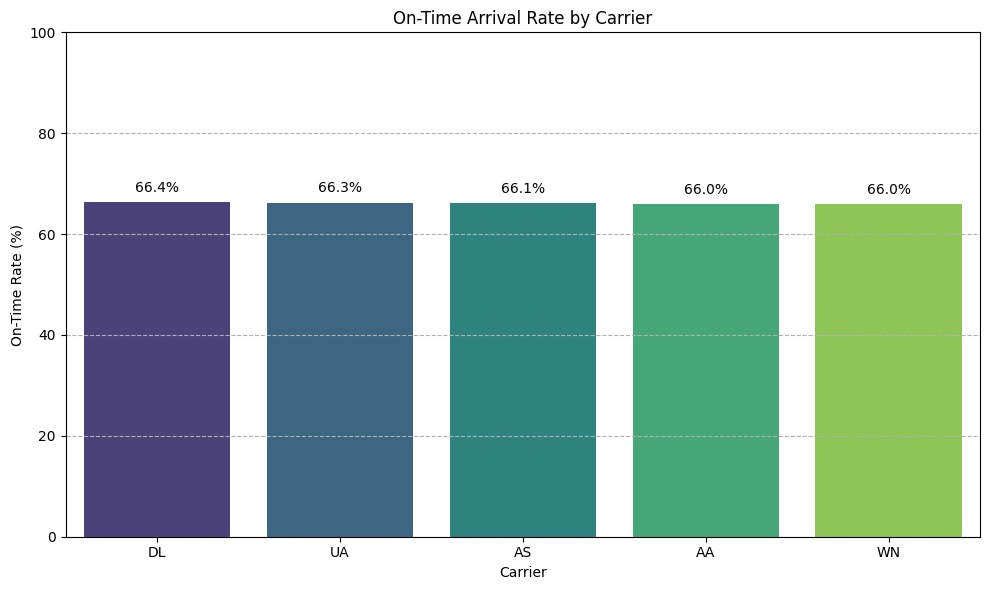

In [ ]:
# Prompt A — On-Time Rate by Carrier (Bar Chart)
on_time_rate = df_flights.groupby('carrier')['on_time'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=on_time_rate.index, y=on_time_rate.values, palette='viridis')
plt.title('On-Time Arrival Rate by Carrier')
plt.xlabel('Carrier')
plt.ylabel('On-Time Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--')

# Add percentage labels on bars
for i, v in enumerate(on_time_rate.values):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

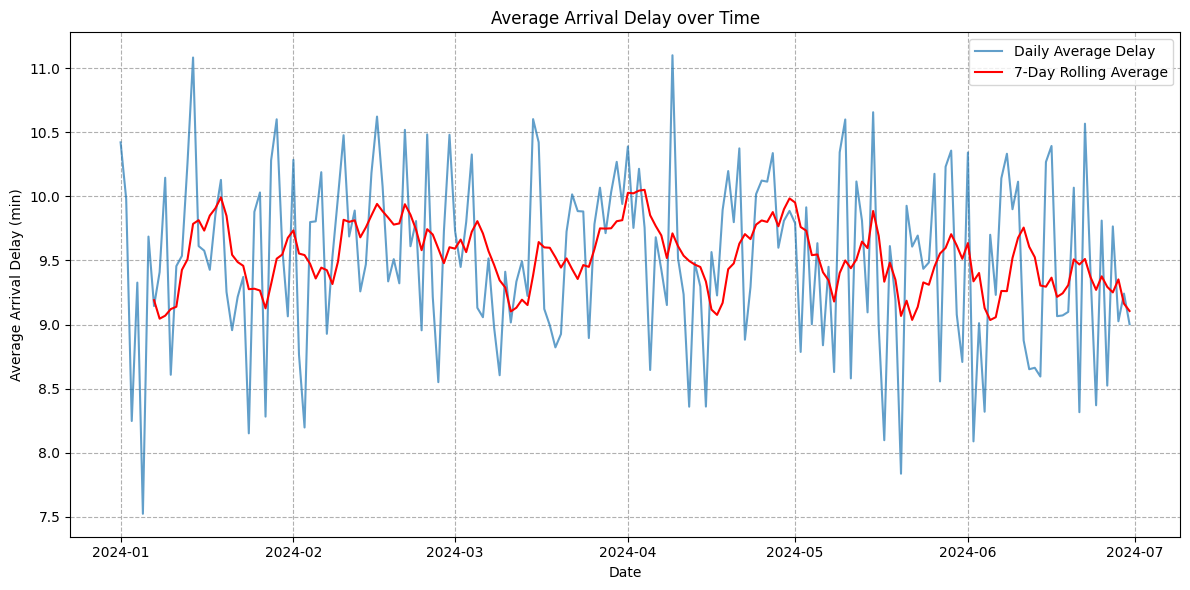

In [ ]:
# Prompt B — Average Arrival Delay over Time (Line Chart)
daily_avg_delay = df_flights.groupby('date')['arr_delay_min'].mean()
rolling_avg_delay = daily_avg_delay.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_avg_delay.index, daily_avg_delay.values, label='Daily Average Delay', alpha=0.7)
plt.plot(rolling_avg_delay.index, rolling_avg_delay.values, label='7-Day Rolling Average', color='red')
plt.title('Average Arrival Delay over Time')
plt.xlabel('Date')
plt.ylabel('Average Arrival Delay (min)')
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

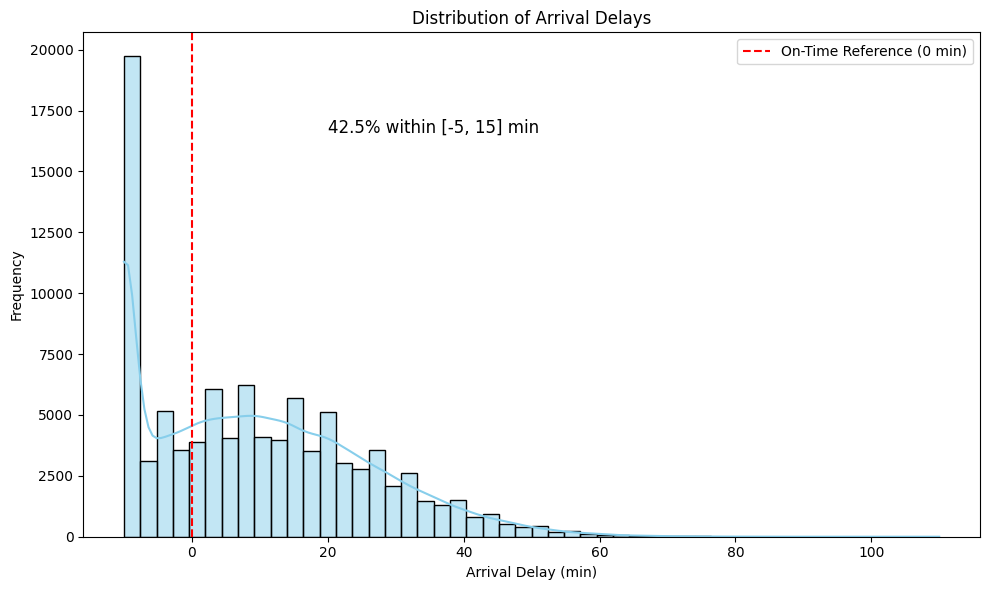

In [ ]:
# Prompt C — Delay Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df_flights['arr_delay_min'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (min)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='On-Time Reference (0 min)')

# Annotate percent of flights within [-5, 15] minutes
on_time_window = df_flights[(df_flights['arr_delay_min'] >= -5) & (df_flights['arr_delay_min'] <= 15)].shape[0]
total_flights = df_flights.shape[0]
percent_on_time_window = (on_time_window / total_flights) * 100

plt.text(20, plt.ylim()[1] * 0.8, f'{percent_on_time_window:.1f}% within [-5, 15] min', fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-2456642263.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=route_load_factor.values, y=route_load_factor_labels, palette='viridis')


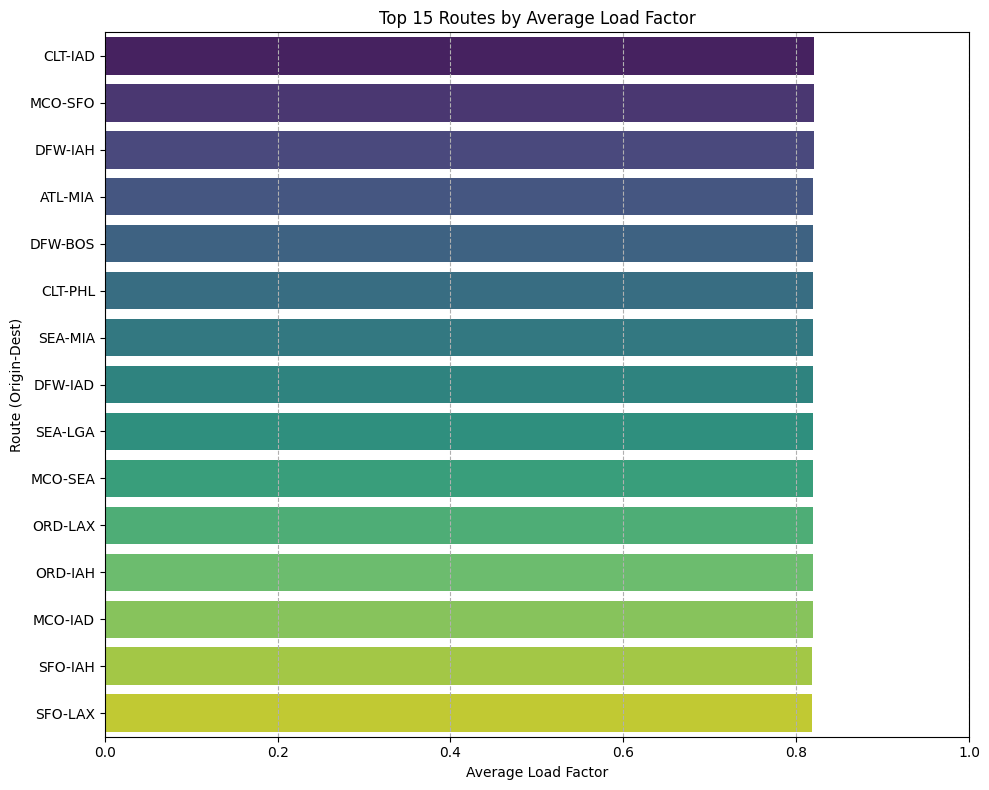

In [ ]:
# Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
route_load_factor = df_flights.groupby(['origin', 'dest'])['load_factor'].mean().sort_values(ascending=False).head(15)
route_load_factor_labels = [f'{o}-{d}' for o, d in route_load_factor.index]

plt.figure(figsize=(10, 8))
sns.barplot(x=route_load_factor.values, y=route_load_factor_labels, palette='viridis')
plt.title('Top 15 Routes by Average Load Factor')
plt.xlabel('Average Load Factor')
plt.ylabel('Route (Origin-Dest)')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

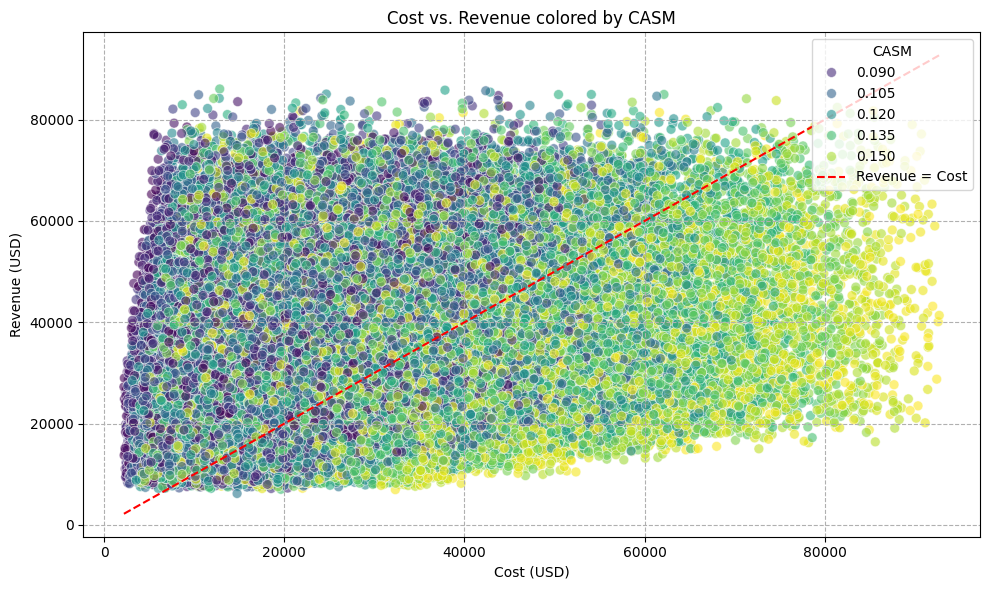

In [ ]:
# Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_flights, x='cost_usd', y='revenue_usd', hue='casm', palette='viridis', alpha=0.6, s=50)
plt.title('Cost vs. Revenue colored by CASM')
plt.xlabel('Cost (USD)')
plt.ylabel('Revenue (USD)')
plt.plot([df_flights['cost_usd'].min(), df_flights['cost_usd'].max()],
         [df_flights['cost_usd'].min(), df_flights['cost_usd'].max()],
         color='red', linestyle='--', label='Revenue = Cost') # y=x line

plt.legend(title='CASM')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


##USED LOOKER STUDIO

In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)


#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project="database-project-467")


In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

# Initialize client
client = bigquery.Client(project="database-project-467")

# Destination table (make sure dataset exists)
table_id = "database-project-467.lab1_foundation.airline_kpis_synthetic"

# Load DataFrame into BigQuery
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()  # Waits for job to finish

print("✅ Loaded to BigQuery:", table_id)


Forbidden: 403 GET https://bigquery.googleapis.com/bigquery/v2/projects/database-project-467/datasets/lab1_foundation/tables/airline_kpis_synthetic?prettyPrint=false: Access Denied: Table database-project-467:lab1_foundation.airline_kpis_synthetic: Permission bigquery.tables.get denied on table database-project-467:lab1_foundation.airline_kpis_synthetic (or it may not exist).

### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
Sorting the carriers on time versus alphabetically was the most important decision as it allowed for actually useful viewing.  Next, I think I would sort by airlines, and maybe run some analysis to see if we can find detailed on how each carrier handles delays and how long those delays are.  I also would like to label and color in a more effective manner for. a better viewing experience.

---
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  
